<a href="https://colab.research.google.com/github/sojiseung/sjs0424/blob/main/m3_%EB%B6%84%EC%84%9D_%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC/%EA%B3%BC%EC%A0%9C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

과제3.
Q1. data_rev.csv를 불러와서 추가적으로 의미있는 3개의 인사이트를 반영한 후 탐색적 분석을 통하여 그 내용을 통계적 시각적으로 도출하고 인사이트가 반영되었는지 여부를 기술하시고 data_analysis.csv로 저장하세요.

Q2. data_analysis.csv를 기반으로 아래 예시를 참조하여 새로운 분석 과제를 정의한 후 그 과제에 적합한 분석용 데이터셋을 만든 후 과제에 적합한 이유 및 특징을 기술하고 data_obj.csv로 저장하세요.

(예시)고객별 구매감소 원인을 파악하기 위한 분석형 데이터셋을 생성한 후 탐색적 분석을 수행.(거래기준 데이터 -> 고객기준 데이터로 변환)

In [130]:
import pandas as pd
import numpy as np
import random
from datetime import datetime
import time
from scipy.stats import norm
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving data_rev.csv to data_rev.csv


In [109]:
df = pd.read_csv('data_rev.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   id          10000 non-null  int64  
 2   gender      10000 non-null  int64  
 3   region      10000 non-null  object 
 4   no          10000 non-null  int64  
 5   date        10000 non-null  object 
 6   day         10000 non-null  object 
 7   product     10000 non-null  int64  
 8   price       9990 non-null   float64
 9   quantity    9990 non-null   float64
 10  time        10000 non-null  int64  
 11  amount      10000 non-null  float64
 12  age_ca      10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1015.8+ KB


In [110]:
df1 = df.copy()

In [111]:
df1.drop(columns=['Unnamed: 0'], inplace=True)
df1.head()

,id,gender,region,no,date,day,product,price,quantity,time,amount,age_ca
0,1,0,busan,1175,2020-05-23,토,20,26129.364886,46.281099,20,1.775766e+06,6
1,1,0,busan,1456,2021-10-02,토,30,48465.029017,46.196095,6,1.775778e+06,6
2,1,0,busan,2794,2020-06-15,월,20,28476.098700,49.125381,1,1.775739e+06,6
3,1,0,busan,2801,2021-06-16,수,30,40006.263131,59.132364,16,1.775782e+06,6
4,1,0,busan,3809,2020-06-30,화,20,35436.212472,40.834434,14,1.775722e+06,6


In [95]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        10000 non-null  int64  
 1   gender    10000 non-null  int64  
 2   region    10000 non-null  object 
 3   no        10000 non-null  int64  
 4   date      10000 non-null  object 
 5   day       10000 non-null  object 
 6   product   10000 non-null  int64  
 7   price     9990 non-null   float64
 8   quantity  9990 non-null   float64
 9   time      10000 non-null  int64  
 10  amount    10000 non-null  float64
 11  age_ca    10000 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 937.6+ KB


In [105]:
df1.set_index('id', inplace=True)

In [112]:
# 결측치 처리
df1['price'].fillna(df1['price'].mean(),inplace = True)
df1['quantity'].fillna(df1['quantity'].mean(), inplace = True)

In [113]:
df1['date'] = pd.to_datetime(df1['date'])
df1['year'] = df1['date'].dt.year

In [49]:
# 필요없는 컬럼 삭제
df1.drop(columns = ['no','date','day'], inplace = True)

In [114]:
df1['price'] = round(df1['price'],2)
df1['amount'] = round(df1['amount'],2)

In [115]:
df1.isnull().sum()

id          0
gender      0
region      0
no          0
date        0
day         0
product     0
price       0
quantity    0
time        0
amount      0
age_ca      0
year        0
dtype: int64

In [122]:
c_df = df1.groupby('id').agg({
    'gender' : 'first',
    'region' : 'first',
    'age_ca' : 'first',
    'amount' : [
        lambda x : x[(df1['year'] == 2020) & (df1['product'] == 10)].sum(),
        lambda x : x[(df1['year'] == 2020) & (df1['product'] == 20)].sum(),
        lambda x : x[(df1['year'] == 2020) & (df1['product'] == 30)].sum(),
        lambda x : x[(df1['year'] == 2021) & (df1['product'] == 10)].sum(),
        lambda x : x[(df1['year'] == 2021) & (df1['product'] == 20)].sum(),
        lambda x : x[(df1['year'] == 2021) & (df1['product'] == 30)].sum()
    ]
}).reset_index()

c_df.columns = ['id','gender','region','age_ca','20_10_amount','20_20_amount','20_30_amount','21_10_amount','21_20_amount','21_30_amount']
c_df.head()

,id,gender,region,age_ca,20_10_amount,20_20_amount,20_30_amount,21_10_amount,21_20_amount,21_30_amount
0,1,0,busan,6,0.00,7103007.62,1775749.41,0.00,0.00,7103108.40
1,2,1,busan,3,0.00,0.00,5327195.86,1775758.30,1775722.80,1775640.46
2,3,1,suwon,3,3551564.03,3551577.47,1775816.98,3551511.90,3551475.35,5327431.35
3,4,0,seoul,1,3551419.80,3551482.35,8878754.98,8878840.52,7103030.10,1775789.14
4,5,1,suwon,6,1775783.69,7103040.72,0.00,7103065.71,1775774.96,0.00


<Axes: xlabel='gender', ylabel='None'>

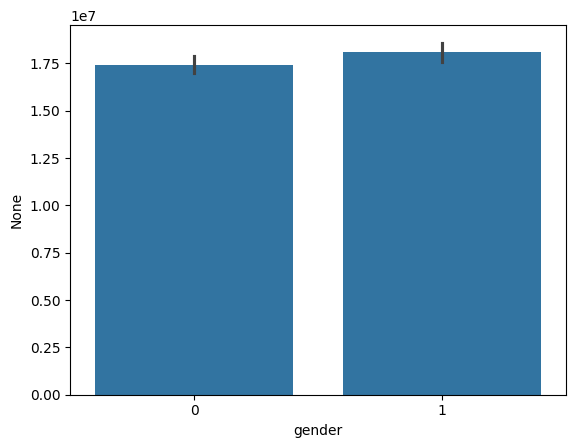

In [135]:
c_df['20_total_amount'] = c_df['20_10_amount'] + c_df['20_20_amount'] + c_df['20_30_amount']
c_df['21_total_amount'] = c_df['21_10_amount'] + c_df['21_20_amount'] + c_df['21_30_amount']

total_20_21 = c_df['20_total_amount'] + c_df['21_total_amount']

sns.barplot(x = c_df['gender'], y = total_20_21)

In [117]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1000 non-null   int64  
 1   gender        1000 non-null   int64  
 2   region        1000 non-null   object 
 3   age_ca        1000 non-null   int64  
 4   20_10_amount  1000 non-null   float64
 5   20_20_amount  1000 non-null   float64
 6   20_30_amount  1000 non-null   float64
 7   21_10_amount  1000 non-null   float64
 8   21_20_amount  1000 non-null   float64
 9   21_30_amount  1000 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 78.2+ KB
